<a href="https://colab.research.google.com/github/Guylord/Auto-Insurance-Fraud-Detection/blob/main/Auto_Insurance_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob # Import the glob module

# Download latest version
path_to_directory = kagglehub.dataset_download("buntyshah/auto-insurance-claims-data")

print("Path to dataset files:", path_to_directory)

# Find the CSV file within the downloaded directory
# This assumes there is only one CSV file in the directory
csv_files = glob.glob(f"{path_to_directory}/*.csv")

if len(csv_files) > 0:
    path_to_csv_file = csv_files[0]
    df = pd.read_csv(path_to_csv_file)
    print("Successfully loaded the CSV file.")
else:
    print("No CSV file found in the downloaded directory.")
    # You might want to add error handling or investigate the directory contents here


ModuleNotFoundError: No module named 'kagglehub'

In [ ]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# EDA

<ipython-input-4-11b09e768cdc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud_reported', data=df, palette='Set2')


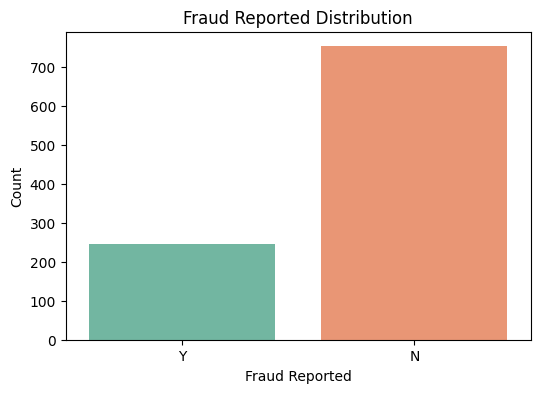

In [ ]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud_reported', data=df, palette='Set2')
plt.title('Fraud Reported Distribution')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

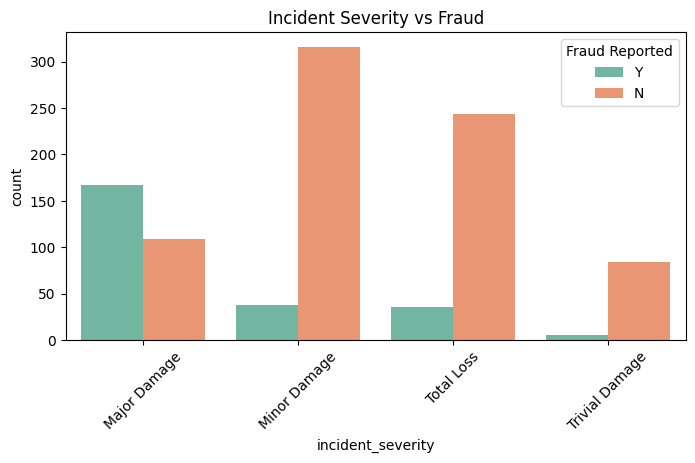

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='incident_severity', hue='fraud_reported', palette='Set2')
plt.title('Incident Severity vs Fraud')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported')
plt.show()

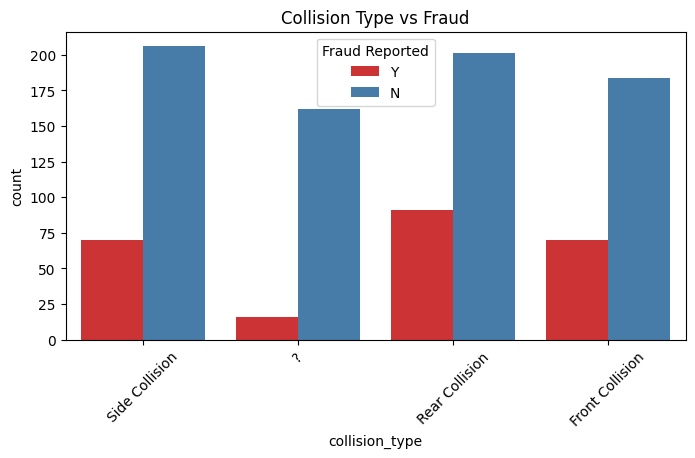

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='collision_type', hue='fraud_reported', palette='Set1')
plt.title('Collision Type vs Fraud')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported')
plt.show()

In [ ]:
df['collision_type'].value_counts()

,count
collision_type,
Rear Collision,292
Side Collision,276
Front Collision,254
?,178


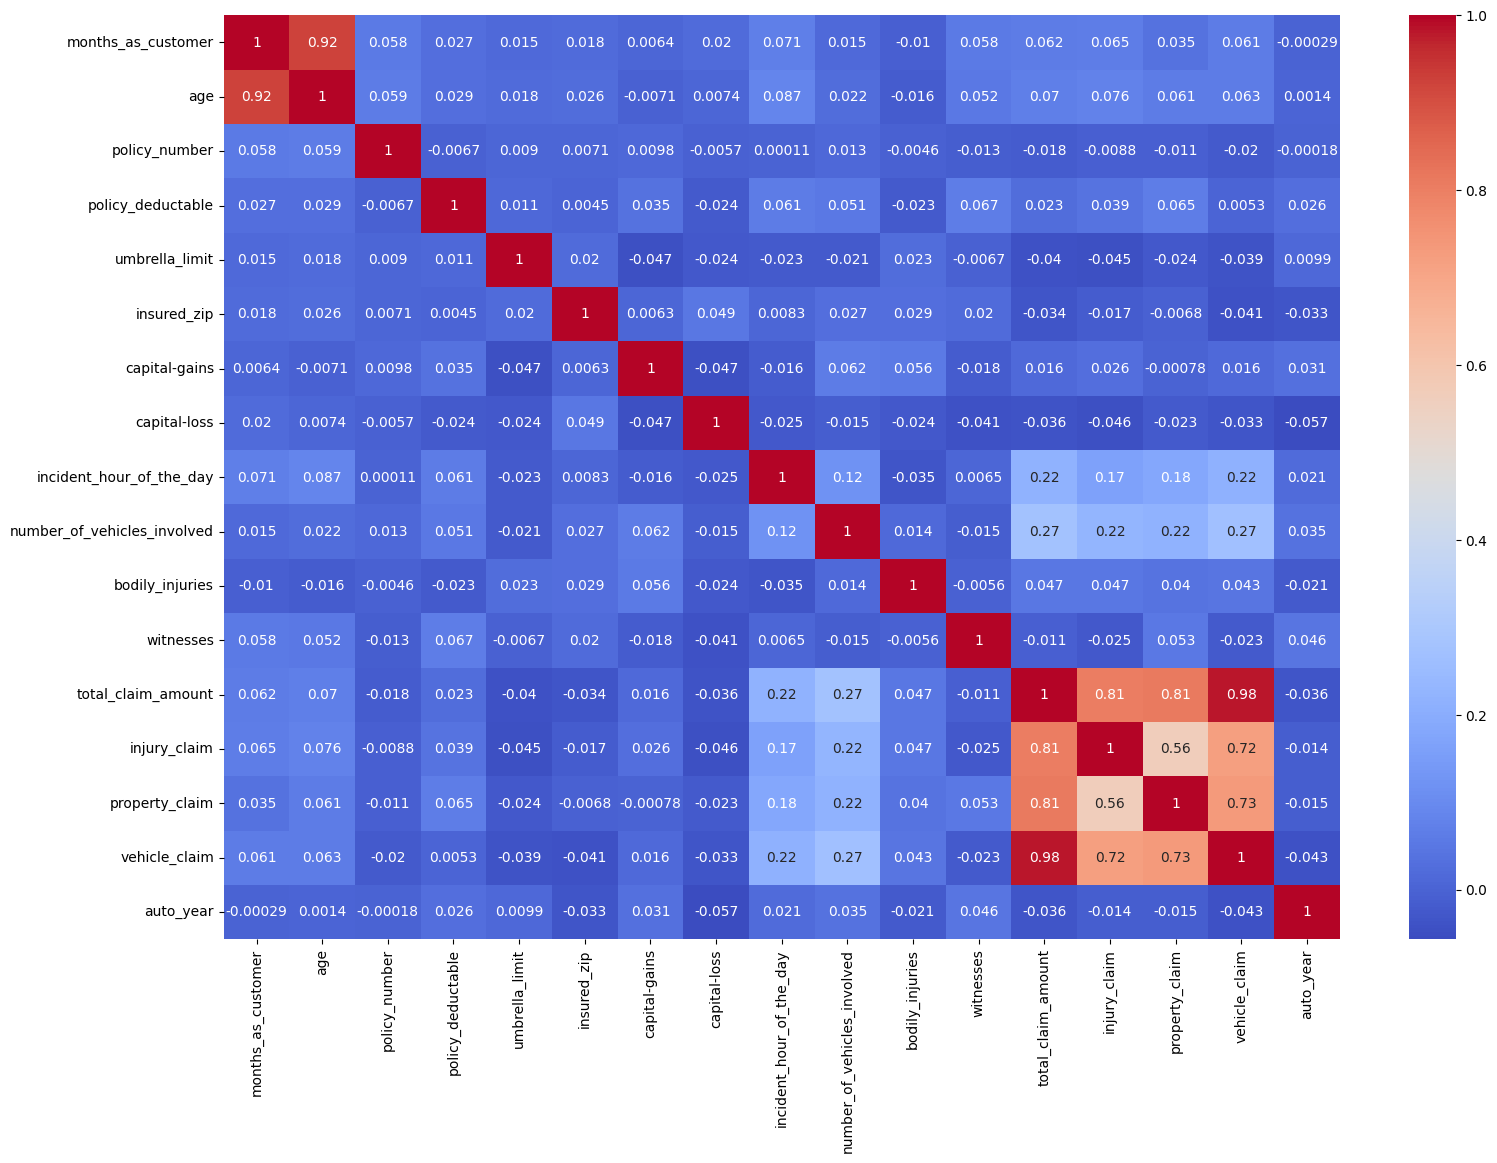

In [ ]:
corr = df.select_dtypes('int').corr()

plt.figure(figsize = (18, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

# Preprocessing

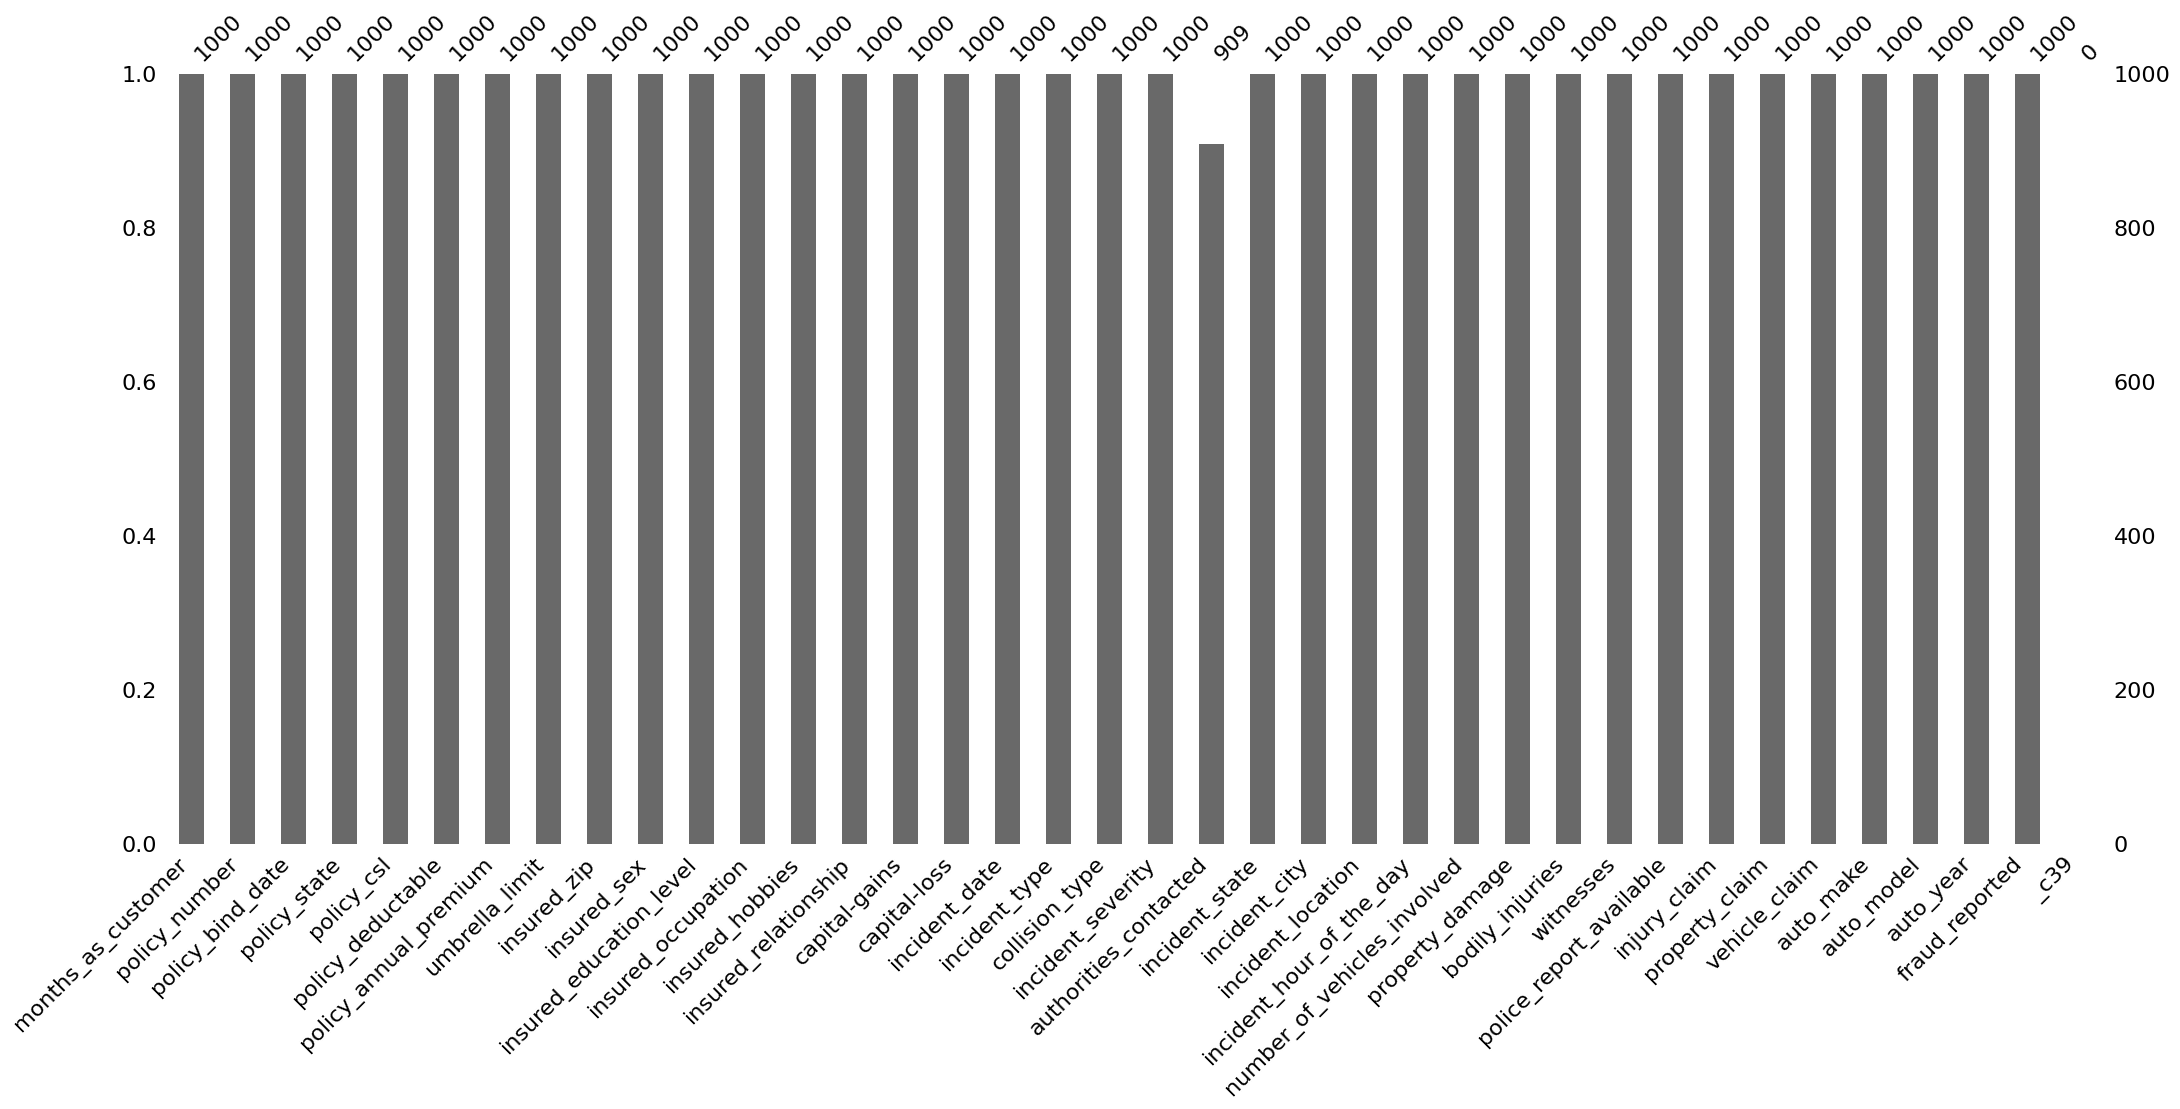

In [ ]:
import missingno as msno

msno.bar(df)
plt.show()

In [ ]:
df['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [ ]:
df['authorities_contacted'].fillna('Other', inplace=True)

<ipython-input-12-d8b2a0360c42>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['authorities_contacted'].fillna('Other', inplace=True)


In [ ]:
df['authorities_contacted'].isna().sum()

np.int64(0)

Feature engineering and selection

In [ ]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce')
df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce')
df['days_since_bind'] = (df['incident_date'] - df['policy_bind_date']).dt.days

In [ ]:
cols_to_drop = ['policy_number','policy_bind_date',
                'policy_state','insured_zip',
                'incident_location','incident_date',
                'incident_state','incident_city',
                'insured_hobbies','auto_make',
                'auto_model','auto_year', '_c39']

df.drop(cols_to_drop, inplace = True, axis = 1)

Encoding categorical columns

In [ ]:
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [ ]:
cat_df = X.select_dtypes('object')

In [ ]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' '?' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Other' 'Fire' 'Ambulance']

property_damage: 
['YES' '?' 'NO']

police_report_available: 
['YES' '?' 'NO']



In [ ]:
df['collision_type'].replace('?', "Other", inplace=True)

cols_with_question = [
    'property_damage',
    'police_report_available'
]

# Replace '?' with 'Not Specified'
for col in cols_with_question:
    df[col] = df[col].replace('?', 'Not specified')

<ipython-input-19-61335302bbb8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['collision_type'].replace('?', "Other", inplace=True)


In [ ]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [ ]:
num_df = X.select_dtypes(include = ['number'])
X = pd.concat([num_df, cat_df], axis = 1)

Normality check, Outlier detection & Scaling

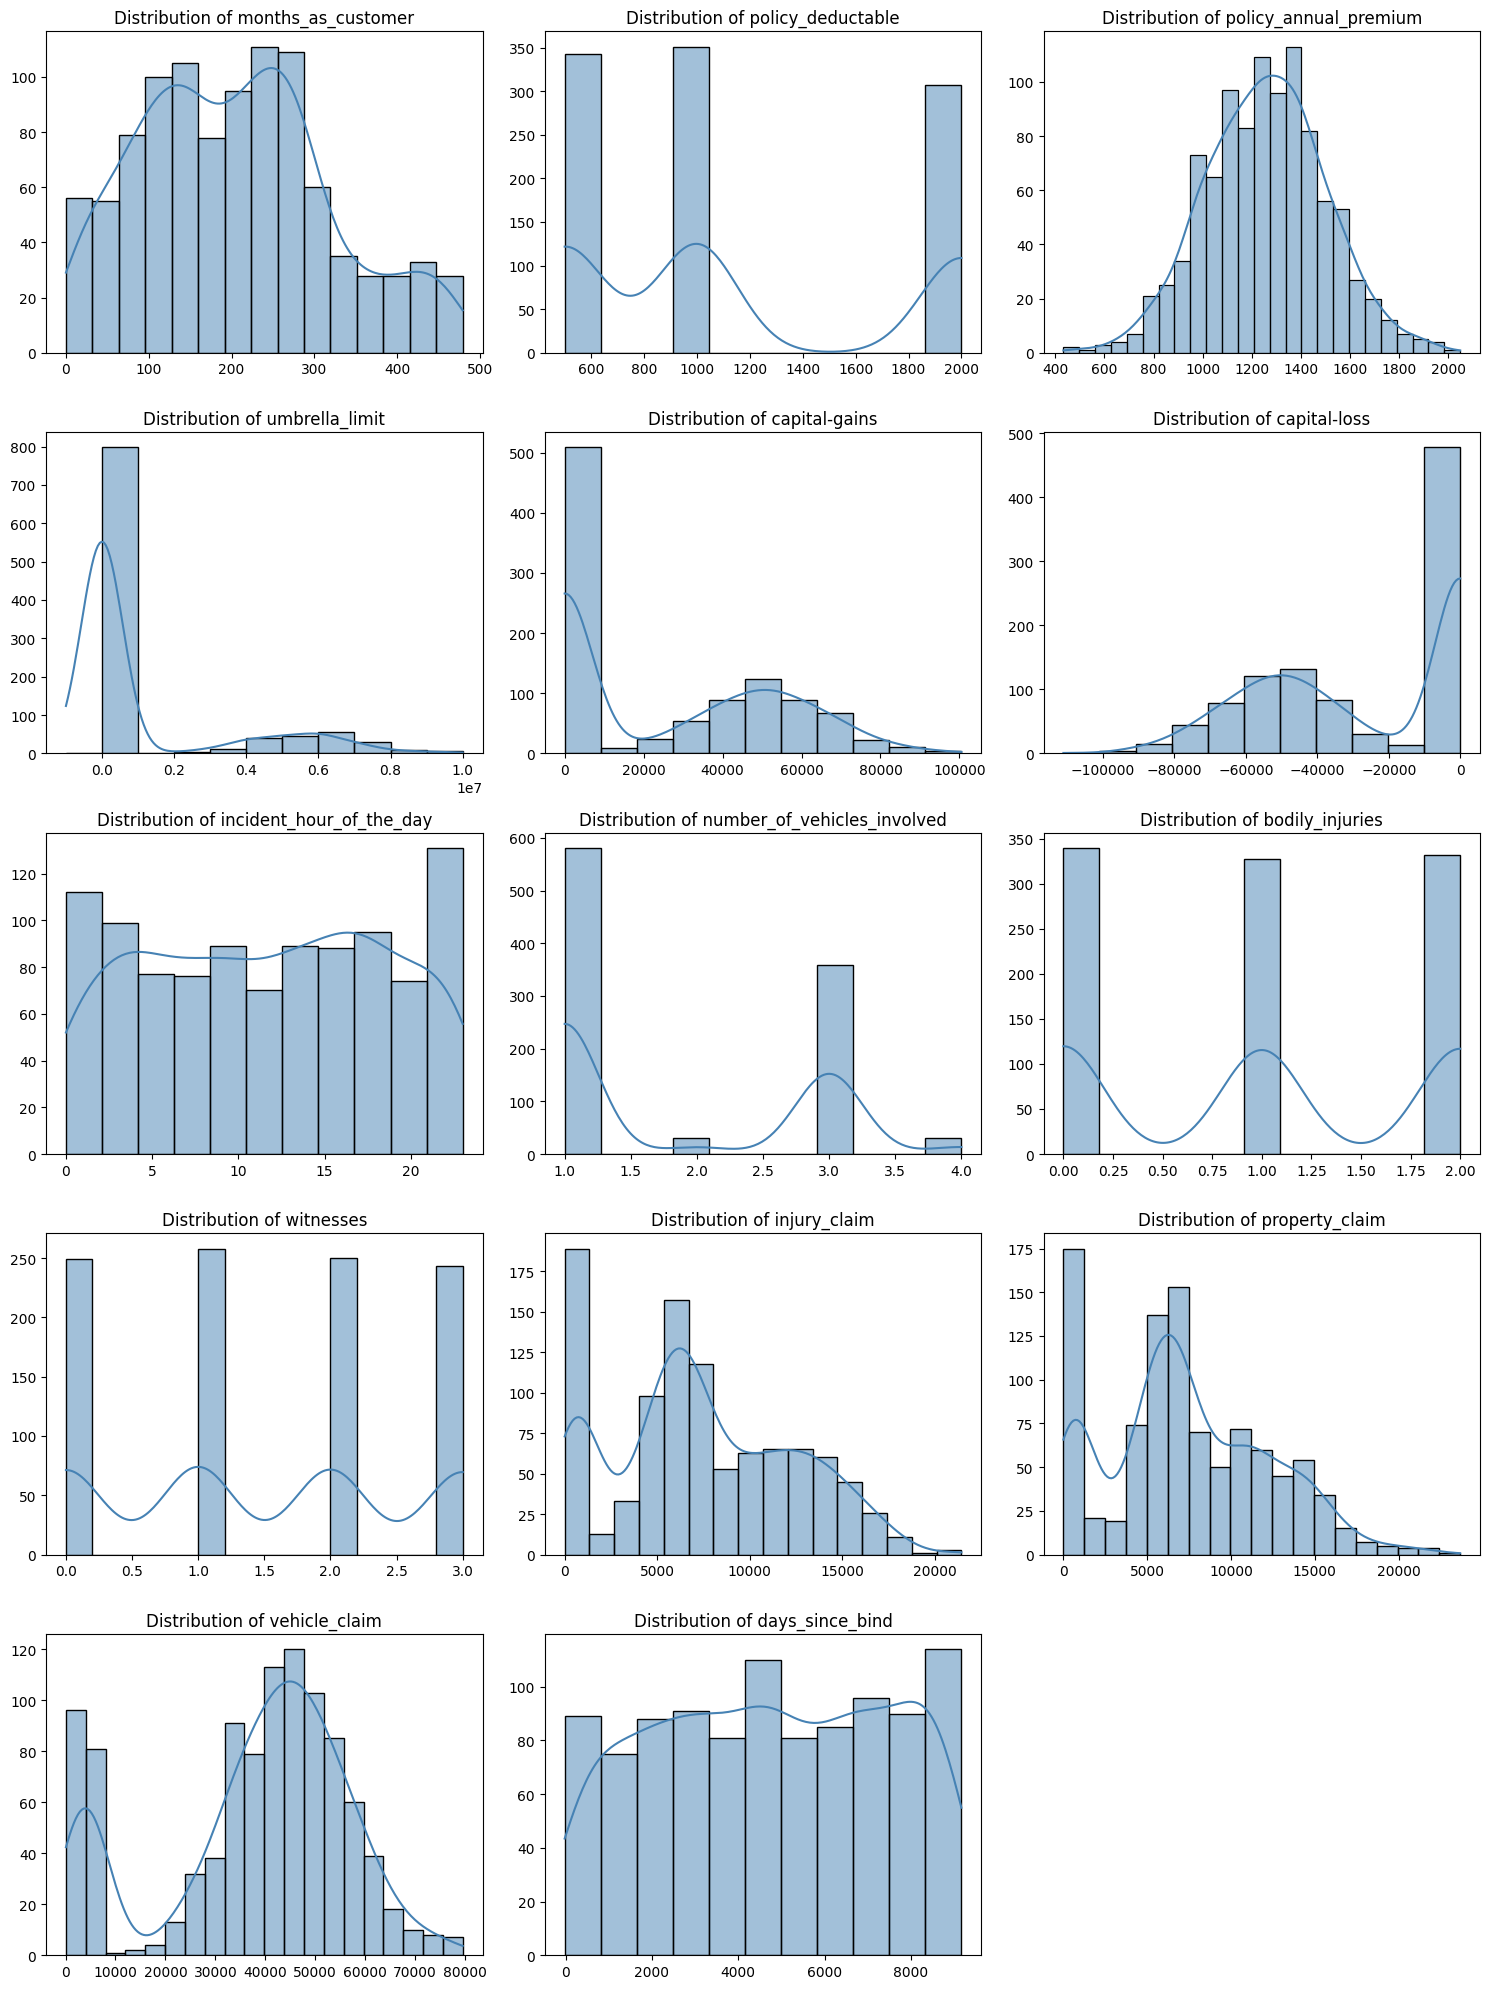

In [ ]:
import math

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numeric_cols)
cols_per_row = 3
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 5, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(X[col], kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

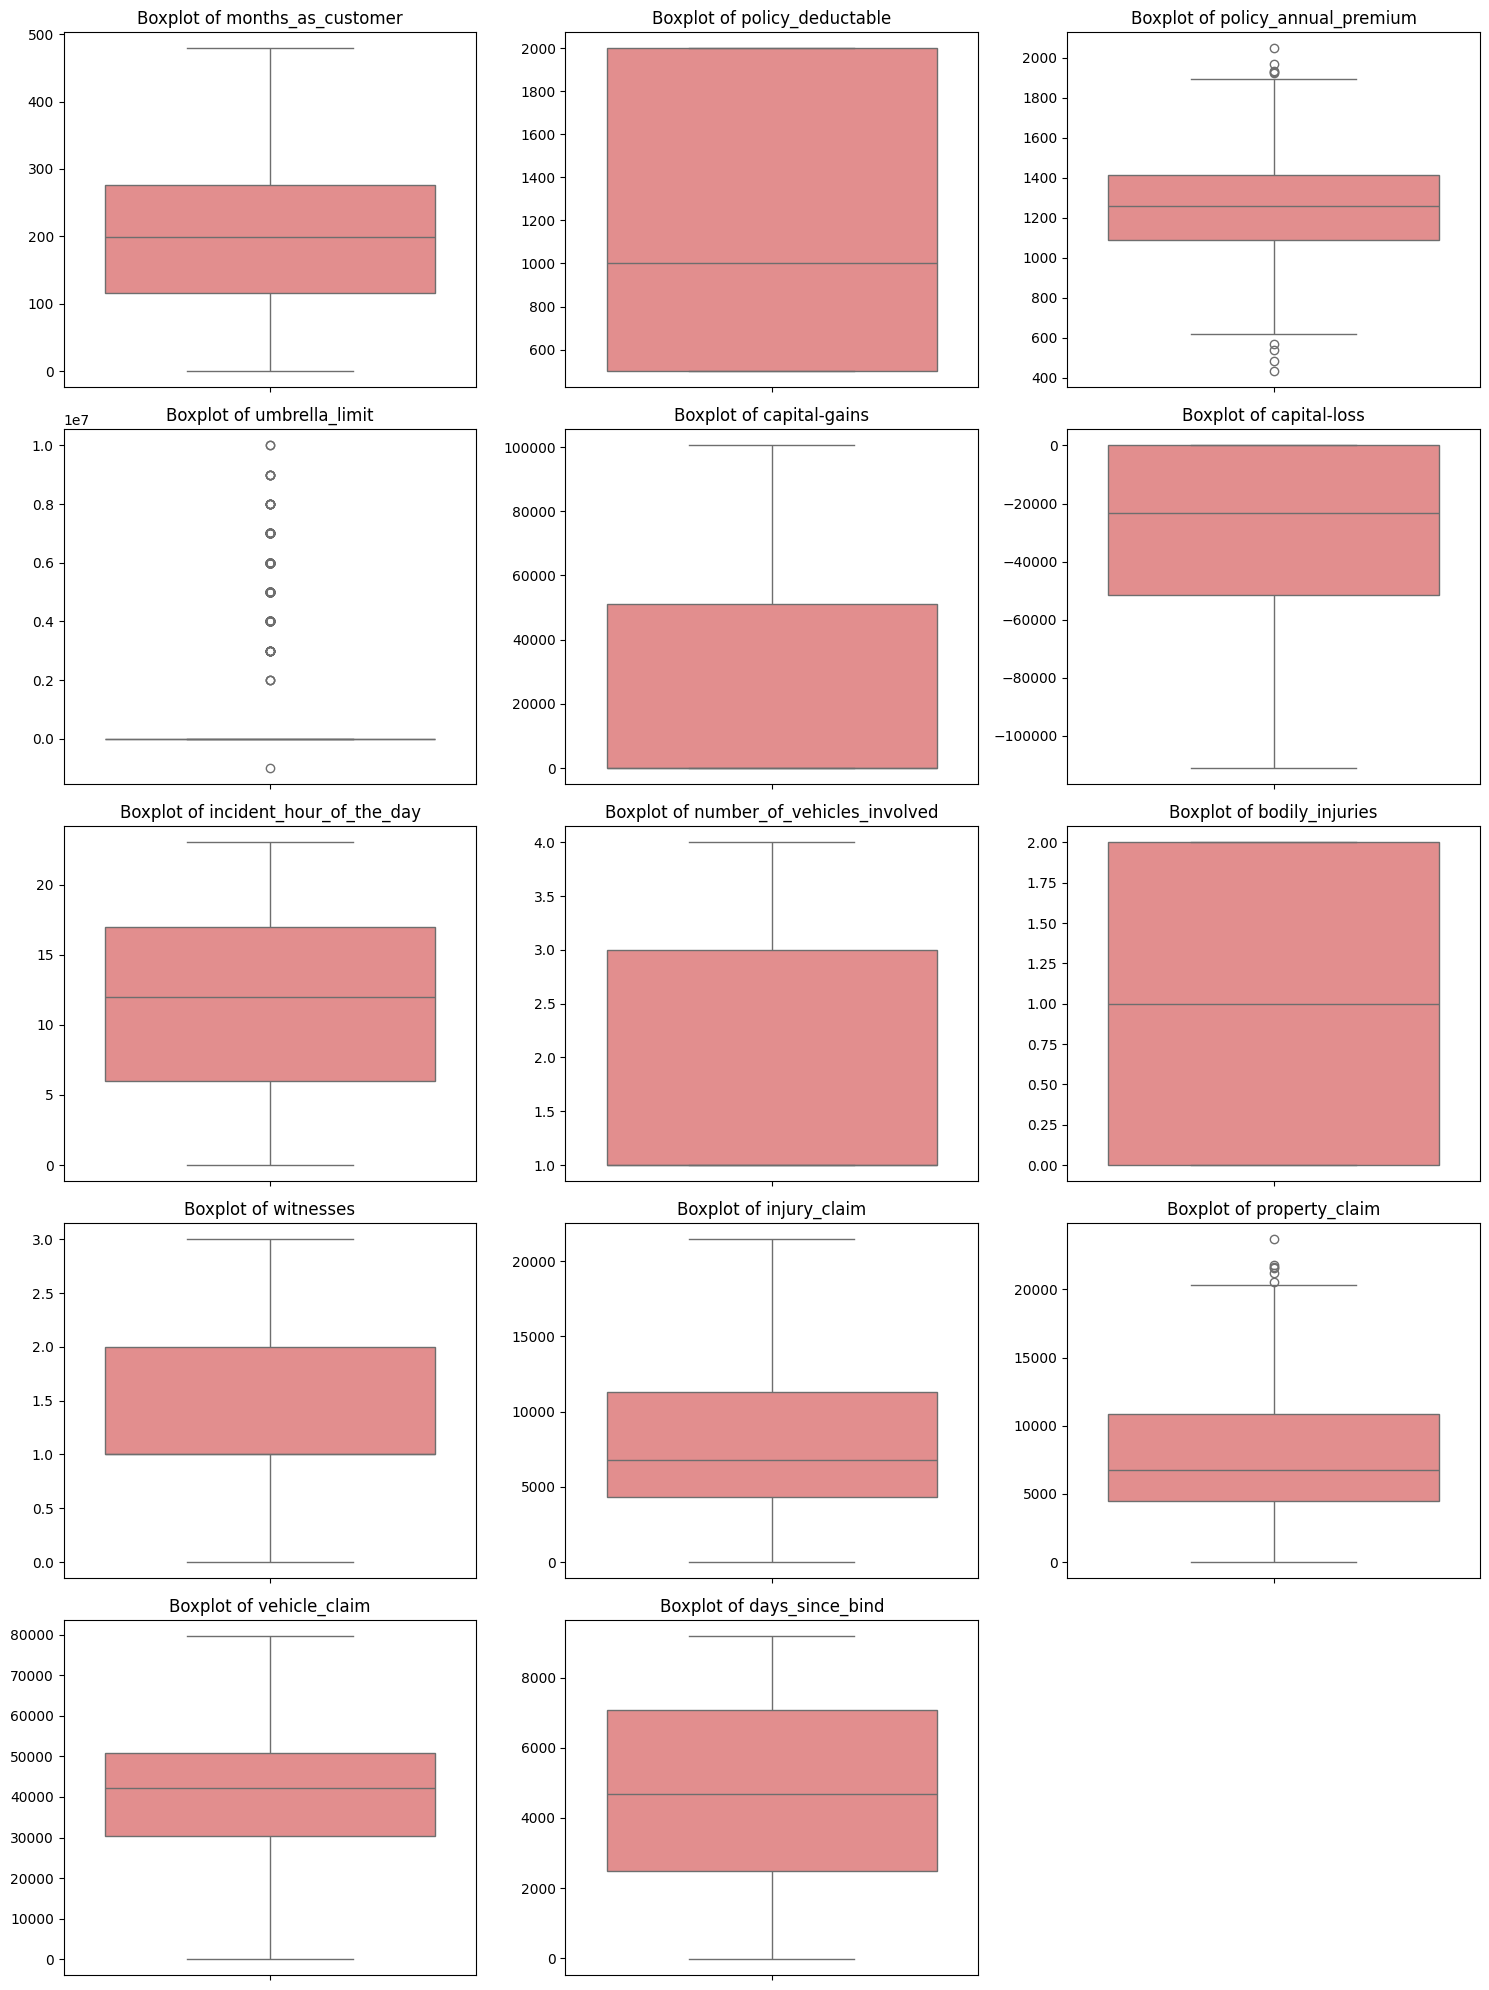

In [ ]:
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 5, num_rows * 4))
axes = axes.flatten()

# Plot each variable
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=X[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = num_df.index)
X = pd.concat([scaled_num_df, cat_df], axis = 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Modelling

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, roc_curve, auc, f1_score,
    precision_score, recall_score)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, confusion_matrix
)

def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    print(f"\n🔍 Evaluating: {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"{'Metric':<20} {'Value':>10}")
    print("-" * 32)
    print(f"{'Accuracy':<20} {accuracy:>10.4f}")
    print(f"{'Precision':<20} {precision:>10.4f}")
    print(f"{'Recall':<20} {recall:>10.4f}")
    print(f"{'F1 Score':<20} {f1:>10.4f}")
    print(f"{'ROC AUC':<20} {roc_auc:>10.4f}")
    print(f"{'PR AUC':<20} {pr_auc:>10.4f}")
    print("\nConfusion Matrix:")
    print(cm)

In [ ]:
# Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=42)
train_and_evaluate_model(lr, "Logistic Regression", X_train, y_train, X_test, y_test)


🔍 Evaluating: Logistic Regression
Metric                    Value
--------------------------------
Accuracy                 0.7700
Precision                0.5347
Recall                   0.7105
F1 Score                 0.6102
ROC AUC                  0.7486
PR AUC                   0.4812

Confusion Matrix:
[[177  47]
 [ 22  54]]


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
train_and_evaluate_model(dt, "Decision Tree", X_train, y_train, X_test, y_test)


🔍 Evaluating: Decision Tree
Metric                    Value
--------------------------------
Accuracy                 0.7100
Precision                0.4179
Recall                   0.3684
F1 Score                 0.3916
ROC AUC                  0.5972
PR AUC                   0.3140

Confusion Matrix:
[[185  39]
 [ 48  28]]


In [ ]:
# Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
train_and_evaluate_model(rf, "Random Forest", X_train, y_train, X_test, y_test)


🔍 Evaluating: Random Forest
Metric                    Value
--------------------------------
Accuracy                 0.7533
Precision                0.6250
Recall                   0.0658
F1 Score                 0.1190
ROC AUC                  0.7731
PR AUC                   0.5023

Confusion Matrix:
[[221   3]
 [ 71   5]]


In [ ]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
train_and_evaluate_model(xgb, "XGBoost", X_train, y_train, X_test, y_test)


🔍 Evaluating: XGBoost
Metric                    Value
--------------------------------
Accuracy                 0.7900
Precision                0.6102
Recall                   0.4737
F1 Score                 0.5333
ROC AUC                  0.7375
PR AUC                   0.5260

Confusion Matrix:
[[201  23]
 [ 40  36]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:05:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# LightGBM
lgb = LGBMClassifier(class_weight='balanced', random_state=42)
train_and_evaluate_model(lgb, "LightGBM", X_train, y_train, X_test, y_test)


🔍 Evaluating: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 171, number of negative: 529
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1765
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [ ]:
# CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
train_and_evaluate_model(cat, "CatBoost", X_train, y_train, X_test, y_test)


🔍 Evaluating: CatBoost
Metric                    Value
--------------------------------
Accuracy                 0.7733
Precision                0.6000
Recall                   0.3158
F1 Score                 0.4138
ROC AUC                  0.7804
PR AUC                   0.5801

Confusion Matrix:
[[208  16]
 [ 52  24]]


Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
train_and_evaluate_model(best_rf, "Random Forest", X_train, y_train, X_test, y_test)


🔍 Evaluating: Random Forest
Metric                    Value
--------------------------------
Accuracy                 0.8033
Precision                0.6545
Recall                   0.4737
F1 Score                 0.5496
ROC AUC                  0.7906
PR AUC                   0.5555

Confusion Matrix:
[[205  19]
 [ 40  36]]


In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports L1
}

grid_lr = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=1000),
    param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
best_lr

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

In [ ]:
train_and_evaluate_model(best_lr, "Logistic Regression", X_train, y_train, X_test, y_test)


🔍 Evaluating: Logistic Regression
Metric                    Value
--------------------------------
Accuracy                 0.7933
Precision                0.5814
Recall                   0.6579
F1 Score                 0.6173
ROC AUC                  0.7741
PR AUC                   0.5307

Confusion Matrix:
[[188  36]
 [ 26  50]]


In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid_dt,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
best_dt

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, random_state=42)

In [ ]:
train_and_evaluate_model(best_dt, "Decision Trees", X_train, y_train, X_test, y_test)


🔍 Evaluating: Decision Trees
Metric                    Value
--------------------------------
Accuracy                 0.7967
Precision                0.5882
Recall                   0.6579
F1 Score                 0.6211
ROC AUC                  0.7640
PR AUC                   0.4977

Confusion Matrix:
[[189  35]
 [ 26  50]]


In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, 5, 10]  # For imbalance
}

grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
best_xgb

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:07:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
train_and_evaluate_model(best_xgb, "XG Boost", X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:07:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 Evaluating: XG Boost
Metric                    Value
--------------------------------
Accuracy                 0.7800
Precision                0.5595
Recall                   0.6184
F1 Score                 0.5875
ROC AUC                  0.7578
PR AUC                   0.5358

Confusion Matrix:
[[187  37]
 [ 29  47]]


In [ ]:
param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1],
    'class_weight': ['balanced']
}

grid_lgb = GridSearchCV(
    LGBMClassifier(random_state=42),
    param_grid_lgb,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_lgb.fit(X_train, y_train)
best_lgb = grid_lgb.best_estimator_
best_lgb

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 171, number of negative: 529
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1765
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier(class_weight='balanced', learning_rate=0.01, max_depth=5,
               n_estimators=200, random_state=42)

In [ ]:
train_and_evaluate_model(best_lgb, "LightGBM", X_train, y_train, X_test, y_test)


🔍 Evaluating: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 171, number of negative: 529
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1765
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [ ]:
param_grid_cat = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'iterations': [100, 200]
}

grid_cat = GridSearchCV(
    CatBoostClassifier(verbose=0, random_state=42),
    param_grid_cat,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_cat.fit(X_train, y_train)
best_cat = grid_cat.best_estimator_
best_cat

In [ ]:
train_and_evaluate_model(best_cat, "CatBoost", X_train, y_train, X_test, y_test)


🔍 Evaluating: CatBoost
Metric                    Value
--------------------------------
Accuracy                 0.7900
Precision                0.6226
Recall                   0.4342
F1 Score                 0.5116
ROC AUC                  0.7818
PR AUC                   0.5794

Confusion Matrix:
[[204  20]
 [ 43  33]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.1),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),  # smaller learning rate
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Class weight for imbalance (you can compute exact weights from your data)
class_weight = {0: 1., 1: 5.}

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weight,
    verbose=1
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step - accuracy: 0.4356 - auc: 0.5223 - loss: 1.4923 - val_accuracy: 0.3357 - val_auc: 0.4316 - val_loss: 0.7607
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4317 - auc: 0.5492 - loss: 1.4306 - val_accuracy: 0.3786 - val_auc: 0.4669 - val_loss: 0.7301
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4563 - auc: 0.6102 - loss: 1.3749 - val_accuracy: 0.4357 - val_auc: 0.4913 - val_loss: 0.7185
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4604 - auc: 0.6798 - loss: 1.2079 - val_accuracy: 0.4286 - val_auc: 0.5236 - val_loss: 0.7070
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4846 - auc: 0.6434 - loss: 1.2718 - val_accuracy: 0.4286 - val_auc: 0.5462 - val_loss: 0.7074
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5209 - auc: 0.6966 - loss: 1.1604 - val_accuracy: 0.4571 - val_auc: 0.5577 - val_loss: 0.7088
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {results[1]:.4f}, Test AUC: {results[2]:.4f}")

Test Accuracy: 0.7633, Test AUC: 0.6618
